In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import bornholdt_modulized

In [39]:
M_t_values = pd.read_csv('M_t_50000.csv', index_col=0)

M_t_values


,0
0,124
1,58
2,248
3,194
4,-62
...,...
2997,4824
2998,5152
2999,4556
3000,4708


/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


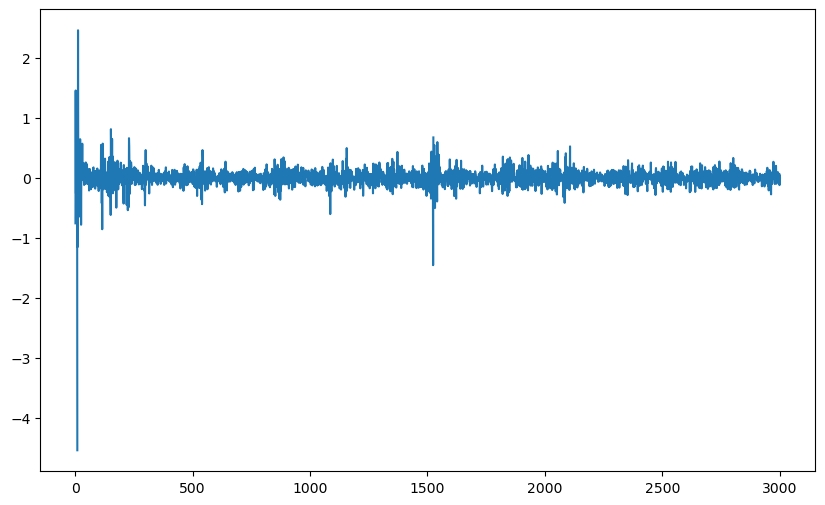

In [43]:
returns = np.log(M_t_values/M_t_values.shift(1))
returns
plt.figure(figsize=(10, 6))
plt.plot(returns)
plt.show()

In [46]:
from arch import arch_model

am = arch_model(returns.dropna(), vol='ARCH', p=10)
res = am.fit()

Iteration:      1,   Func. Count:     14,   Neg. LLF: 14571.287183397255
Iteration:      2,   Func. Count:     32,   Neg. LLF: 1119.1230125764785
Iteration:      3,   Func. Count:     48,   Neg. LLF: 451.8571008934672
Iteration:      4,   Func. Count:     62,   Neg. LLF: 13869.61089825259
Iteration:      5,   Func. Count:     76,   Neg. LLF: 22017.434327057745
Iteration:      6,   Func. Count:     90,   Neg. LLF: -1893.6332294656647
Iteration:      7,   Func. Count:    105,   Neg. LLF: -820.9548562736896
Iteration:      8,   Func. Count:    119,   Neg. LLF: -2192.918106283789
Iteration:      9,   Func. Count:    134,   Neg. LLF: -2265.4247535691397
Iteration:     10,   Func. Count:    148,   Neg. LLF: -2053.8063380746253
Iteration:     11,   Func. Count:    162,   Neg. LLF: -1963.7417869393657
Iteration:     12,   Func. Count:    176,   Neg. LLF: -1723.2186854849053
Iteration:     13,   Func. Count:    191,   Neg. LLF: -2312.7756583251858
Iteration:     14,   Func. Count:    206,   Neg

/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02677. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [47]:
print(res.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                2377.83
Distribution:                  Normal   AIC:                          -4731.67
Method:            Maximum Likelihood   BIC:                          -4659.60
                                        No. Observations:                 2997
Date:                Wed, Apr 17 2024   Df Residuals:                     2996
Time:                        15:14:02   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.4884e-04  1.765e-03      0.368      0.713 